# Logistic Regression Model

## Connecting the database

In [1]:
import psycopg2
# Database configuration
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'SWARANGI'
DB_USER = 'postgres'
DB_PASSWORD = '19092002'

In [2]:
# Connect to the PostgreSQL database
def connect_db():
    return psycopg2.connect(
        host=DB_HOST,
        port=DB_PORT,
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD
    )

In [3]:
conn = connect_db()
cursor = conn.cursor()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

# Load and explore data

In [5]:
cursor.execute("SELECT * FROM keystrokes_data;")
records = cursor.fetchall()

# Create a DataFrame from the fetched records
data = pd.DataFrame(records, columns=[desc[0] for desc in cursor.description])

In [6]:
data.head()

,username,h_key1,dd_key1_key2,ud_key1_key2,h_key2,dd_key2_key3,ud_key2_key3,h_key3,dd_key3_key4,ud_key3_key4,...,dd_key5_key6,ud_key5_key6,h_key6,dd_key6_key7,ud_key6_key7,h_key7,dd_key7_key8,ud_key7_key8,h_key8,target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.487,0.392,0.216,0.161,-0.055,0.119,0.240,0.121,0.103,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.751,0.608,0.304,0.240,-0.064,0.119,0.225,0.106,0.103,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.614,0.480,0.336,0.265,-0.071,0.135,0.232,0.097,0.143,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.377,0.290,0.206,0.151,-0.055,0.135,0.184,0.049,0.111,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.351,0.264,0.216,0.153,-0.063,0.119,0.160,0.041,0.143,Genuine


In [7]:
data.columns

Index(['username', 'h_key1', 'dd_key1_key2', 'ud_key1_key2', 'h_key2',
       'dd_key2_key3', 'ud_key2_key3', 'h_key3', 'dd_key3_key4',
       'ud_key3_key4', 'h_key4', 'dd_key4_key5', 'ud_key4_key5', 'h_key5',
       'dd_key5_key6', 'ud_key5_key6', 'h_key6', 'dd_key6_key7',
       'ud_key6_key7', 'h_key7', 'dd_key7_key8', 'ud_key7_key8', 'h_key8',
       'target'],
      dtype='object')

# Data Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

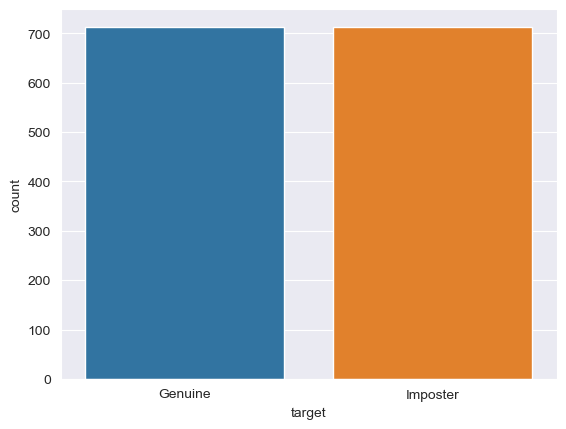

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=data)

# Split data into train and test data 

In [9]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:23])
X = data[features]
y =data['target']
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']

# Create logistic regression model and train it with training data

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

# Predict results

In [13]:
pred = logmodel.predict(X_test)

In [14]:
df = pd.DataFrame(y_test)
se = pd.Series(pred)
df['Predictions'] = se.values
tempdf = pd.DataFrame(logmodel.predict_proba(X_test))
se1 = pd.Series(tempdf[0])
ew = se1.round(decimals=3)
df['Genuine probability'] = ew.values
se2 = pd.Series(tempdf[1])
ew1 = se2.round(decimals=3)
df['Imposter probability'] = ew1.values

In [15]:
df

,target,Predictions,Genuine probability,Imposter probability
455,Genuine,Genuine,0.738,0.262
418,Genuine,Genuine,0.726,0.274
240,Genuine,Genuine,0.647,0.353
718,Imposter,Imposter,0.111,0.889
1169,Imposter,Genuine,0.508,0.492
...,...,...,...,...
1157,Imposter,Genuine,0.508,0.492
1152,Imposter,Genuine,0.630,0.370
783,Imposter,Imposter,0.133,0.867
591,Genuine,Genuine,0.769,0.231


# Check Performance of Model

###  Accuracy

In [16]:
model_accuracy = metrics.accuracy_score(y_test,pred)

In [17]:
y_test.value_counts()

Genuine     149
Imposter    136
Name: target, dtype: int64

In [18]:
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[133  16]
 [ 34 102]]


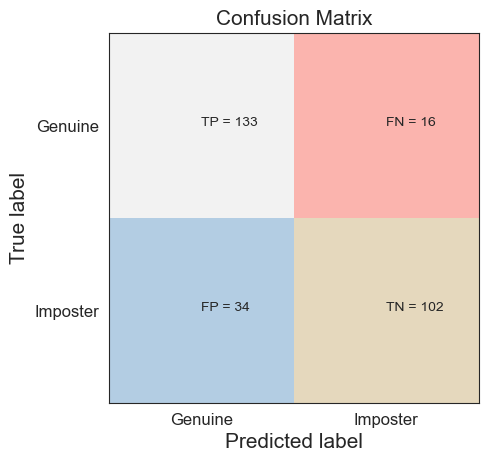

In [19]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### _Basic Terminology_
**True Positive (TP) : ** We correctly predicted the user is Geninue

**True Negative (TN) : ** We correctly predicted the user is Imposter

**False Positive (FP) : ** We incorrectly predicted the user is geninue

**False Negative (FN) : ** We incorrectly predicted the user is imposter

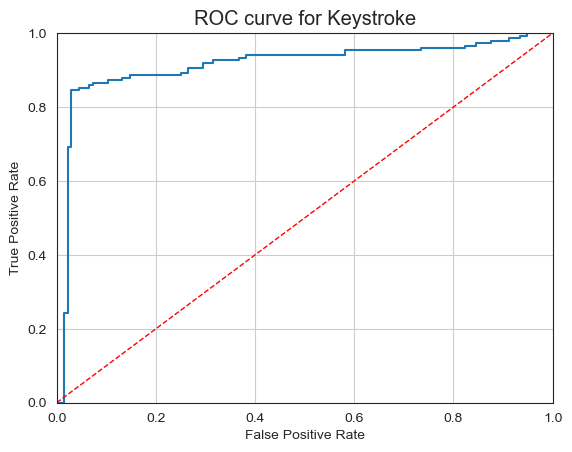

In [20]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)

In [21]:
print("Accuracy of Model is: ", model_accuracy*100)
print()
print("Mis-Classification Rate of Model is: ",(1-model_accuracy)*100)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  82.45614035087719

Mis-Classification Rate of Model is:  17.543859649122805

Area Under Curve:  0.9132945124358467


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.80      0.89      0.84       149
    Imposter       0.86      0.75      0.80       136

    accuracy                           0.82       285
   macro avg       0.83      0.82      0.82       285
weighted avg       0.83      0.82      0.82       285



# Parameter Tuning

In [23]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:23])
    X = data[features]
    X_train = train[features]
    y_train = train['target']
    X_test = test[features]
    y_test = test['target']    
    logmodel = LogisticRegression()
    
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

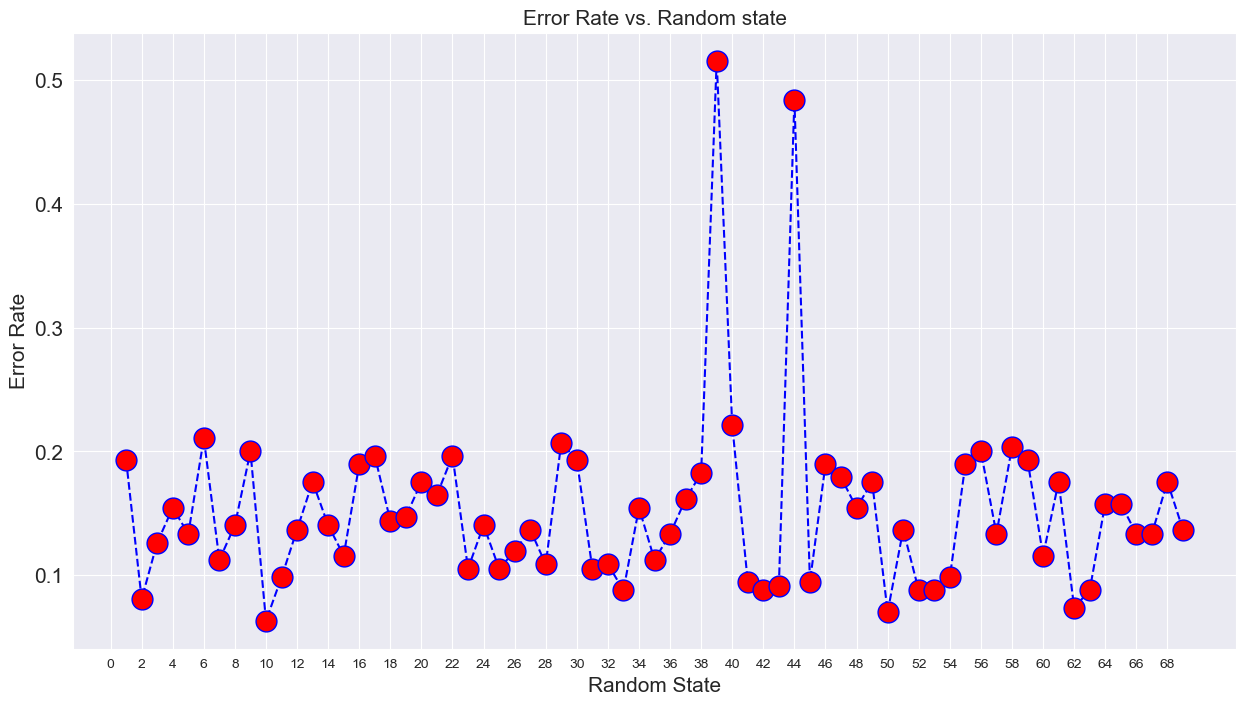

In [24]:
sns.set_style('darkgrid')

ax =plt.figure(figsize=(15,8)).add_subplot(1, 1, 1)
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15,)

plt.title('Error Rate vs. Random state',fontsize=15)
plt.xlabel('Random State',fontsize=15)
plt.ylabel('Error Rate',fontsize=15)
major_ticks = np.arange(0, 70, 2)
minor_ticks = np.arange(0, 70, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)

**From above graph we can say that error rate is minimum for random state num of 24 **

Now lets check accuracy for different values of C while creating logistic regression model

In [25]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
accuracy = []

for i in C_param_range:
      
    train, test = train_test_split(data, test_size = 0.2,random_state = 13)
    features = list(data.columns[1:23])
    X = data[features]
    y =data['target']
    X_train = train[features]
    y_train = train['target']
    X_test = test[features]
    y_test = test['target']
    logmodel = LogisticRegression(C=i)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

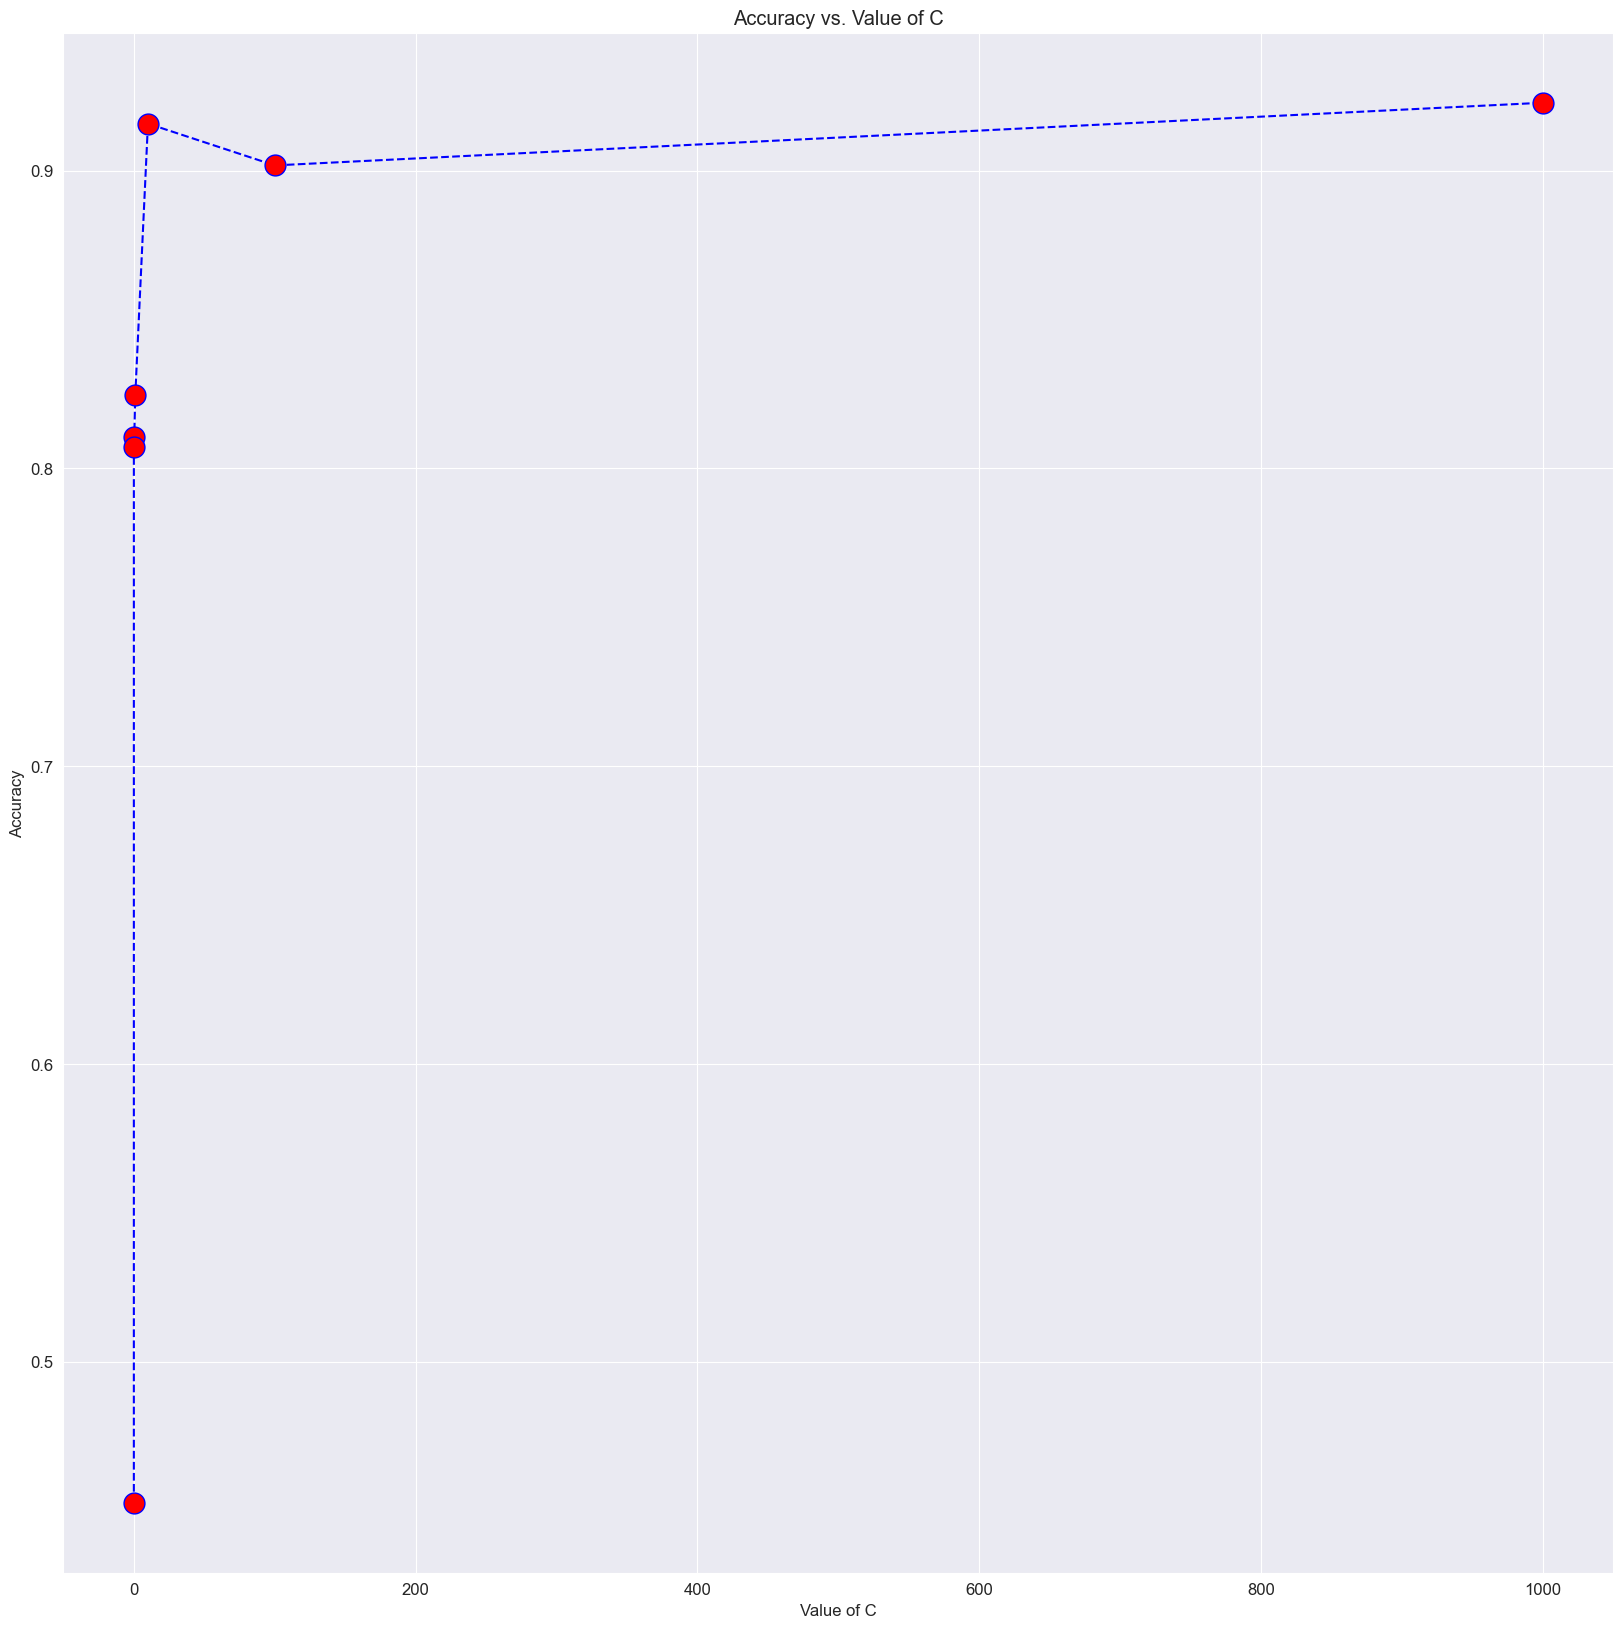

In [26]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_param_range,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. Value of C')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

In [27]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 13)
    features = list(data.columns[1:23])
    X = data[features]
    y =data['target']
    X_train = train[features]
    y_train = train['target']
    X_test = test[features]
    y_test = test['target']
    logmodel = LogisticRegression(C=100)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

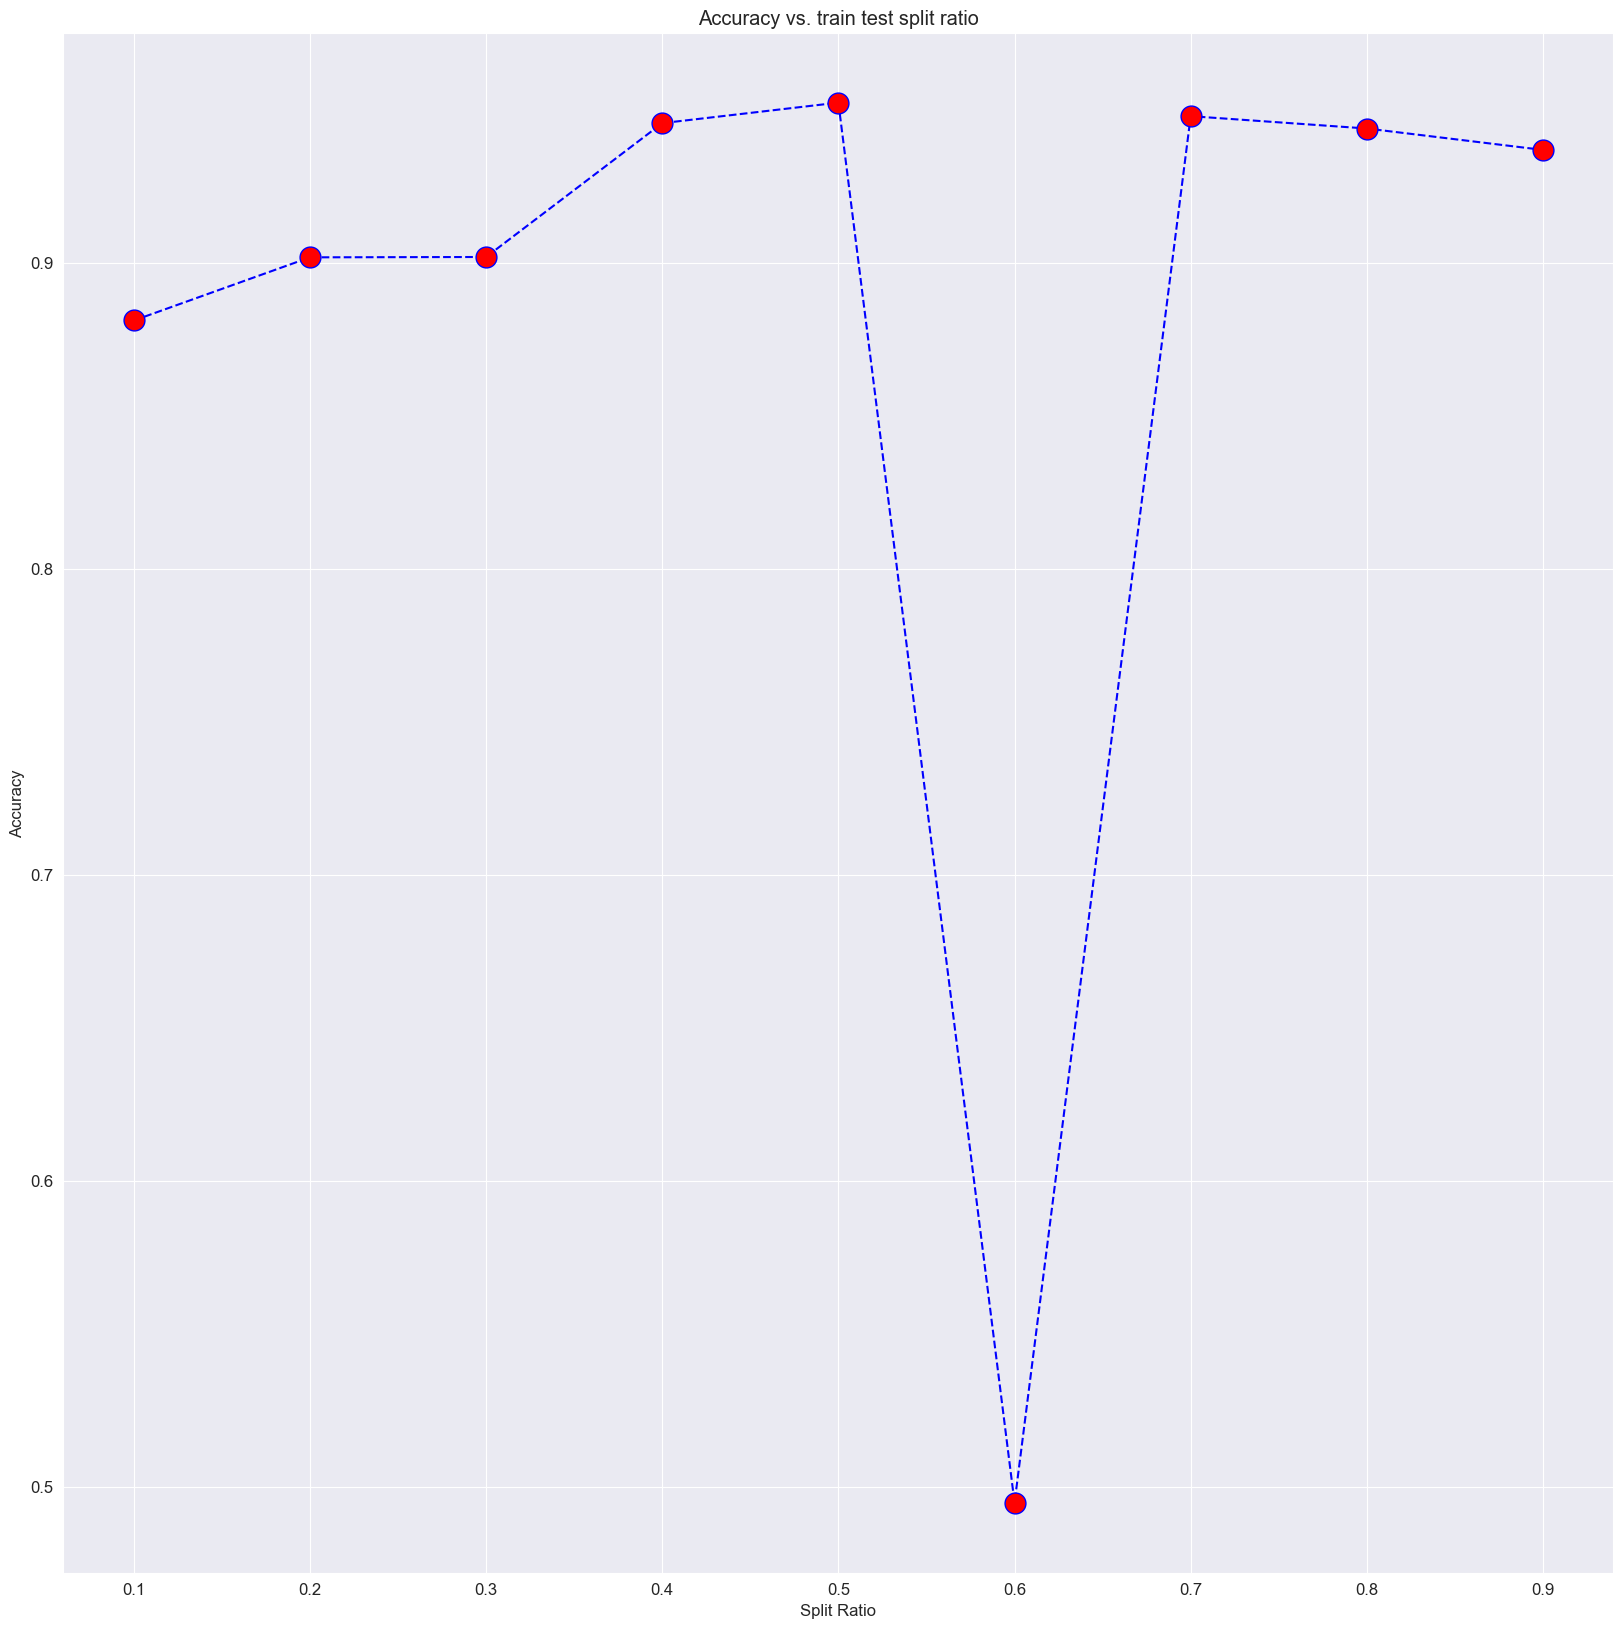

In [28]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

# Performance of model after parameter tuning.

In [29]:
train, test = train_test_split(data, test_size = 0.2, random_state= 24)
features = list(data.columns[1:23])
X = data[features]
y =data['target']
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']
logmodel = LogisticRegression(C=100)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[132  11]
 [ 19 123]]


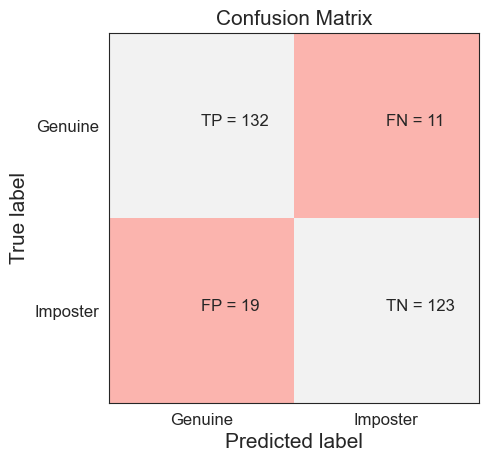

In [30]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Area under curve:  0.954890180242293


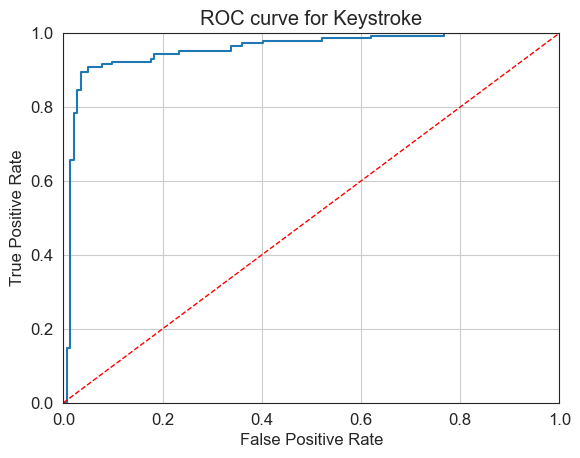

In [31]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)
print("Area under curve: " ,roc_auc)

In [32]:
print("Accuracy of Model is: ",model_accuracy)
print()
print("Mis-Classification Rate of Model is: ",1 - model_accuracy)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  0.8947368421052632

Mis-Classification Rate of Model is:  0.10526315789473684

Area Under Curve:  0.954890180242293


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.87      0.92      0.90       143
    Imposter       0.92      0.87      0.89       142

    accuracy                           0.89       285
   macro avg       0.90      0.89      0.89       285
weighted avg       0.90      0.89      0.89       285



In [34]:
import pickle

In [35]:
pickle.dump(logmodel,open('LB_model.pkl','wb'))